In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
df = pd.read_csv("../Data/cleanedSample.csv",low_memory=False)
dfNoMidnight = pd.read_csv("../Data/cleanedSampleNoMidnight.csv",low_memory=False)

In [9]:
df

,Longitude,Latitude,Street,Day,Violation Code
0,49.889043,-97.213038,Marjorie ST,Monday,37
1,49.889800,-97.145800,Edmonton ST,Friday,1
2,49.895800,-97.146300,Hargrave ST,Monday,2
3,49.889883,-97.147008,St Mary AVE,Thursday,1
4,49.889843,-97.136936,Fort ST,Wednesday,1
...,...,...,...,...,...
99995,49.892040,-97.139610,Garry ST,Friday,1
99996,49.899393,-97.140131,King ST,Friday,1
99997,49.904600,-97.157500,William AVE,Friday,3
99998,49.886800,-97.145800,Kennedy ST,Tuesday,1


In [11]:
dfNoMidnight

,Longitude,Latitude,Street,Day,Violation Code,Time Range
0,49.890180,-97.142286,Donald ST,Friday,1,Daytime (9:00am-3:30pm)
1,49.897200,-97.134900,Bannatyne AVE,Thursday,1,Daytime (9:00am-3:30pm)
2,49.884645,-97.144515,Kennedy ST,Monday,13,Evening (5:00pm-11:00pm)
3,49.890795,-97.140983,St Mary AVE,Tuesday,1,Daytime (9:00am-3:30pm)
4,49.863078,-97.144373,Osborne ST,Wednesday,1,Daytime (9:00am-3:30pm)
...,...,...,...,...,...,...
99995,49.889663,-97.148775,Vaughan ST,Wednesday,13,Daytime (9:00am-3:30pm)
99996,49.887138,-97.144040,Edmonton ST,Thursday,1,Rush Hour Morning (7:30am-9:00am)
99997,49.904600,-97.157400,William AVE,Wednesday,3,Rush Hour Morning (7:30am-9:00am)
99998,49.894165,-97.136211,Pioneer AVE,Tuesday,1,Rush Hour Evening (3:30pm-5:00pm)


In [12]:
numericalCols = ["Longitude","Latitude"]
numericalData = df[numericalCols]

# standardize the numerical data to have a mean of 0 and a variance of 1
scaler = StandardScaler()
numericalDataScaled = scaler.fit_transform(numericalData)
df[numericalCols] = numericalDataScaled

numericalDataScaled2 = scaler.fit_transform(numericalData)
dfNoMidnight[numericalCols] = numericalDataScaled2


C:\Users\User\AppData\Local\Temp\ipykernel_16452\1467450142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

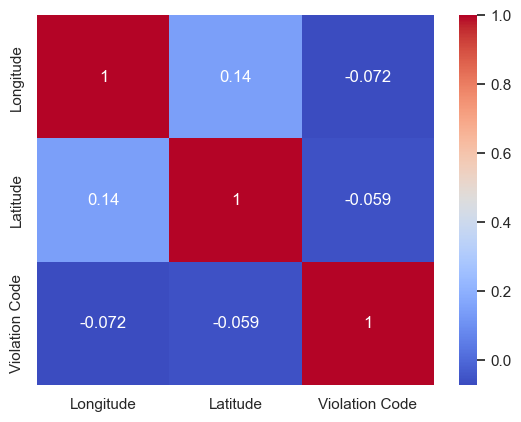

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16452\1303294192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = dfNoMidnight.corr()


<Axes: >

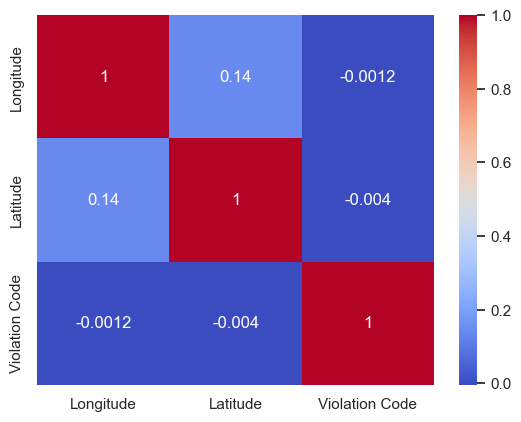

In [14]:
corr_matrix2 = dfNoMidnight.corr()
sns.heatmap(corr_matrix2, cmap="coolwarm", annot=True)